In [12]:
import numpy as np
import pandas as pd
import copy

In [13]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv') # Modify it with your directory
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv') # Modify it with your directory
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv') # Modify it with your directory

In [14]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def format_data(data):
  x = copy.deepcopy(data)
  if 'label' in data.columns:
    x = x.drop(['label'], axis = 1)

  x = x.to_numpy()
  x = np.reshape(x, (x.shape[0], 28, 28))

  if 'label' in data.columns:
    return x, data['label']
  else:
    return x

x_submit = format_data(test)
y_submit = sample_submission['Label']

In [16]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [18]:
def pre_training_data(x, y, num_classes):
  x = x.reshape(x.shape[0], 28, 28, 1)
  y = keras.utils.to_categorical(y, num_classes)
  x = x.astype('float32')
  x /= 255
  return x, y

In [19]:
num_classes = 10
x_train, y_train = pre_training_data(x_train, y_train, num_classes)
x_test, y_test = pre_training_data(x_test, y_test, num_classes)
x_submit, y_submit = pre_training_data(x_submit, y_submit, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_submit.shape[0], 'submit samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
28000 submit samples


In [20]:
input_shape = (28, 28, 1)
batch_size = 128
epochs = 200

model = Sequential()
model.add(Conv2D(32, kernel_size =(3, 3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add( MaxPooling2D(pool_size = (2, 2)) )
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [21]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])

In [22]:
print('Model is training')
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Model is training
Epoch 1/200
469/469 [==============================] - 89s 189ms/step - loss: 2.2562 - accuracy: 0.1989 - val_loss: 2.2008 - val_accuracy: 0.5122
Epoch 2/200
469/469 [==============================] - 87s 186ms/step - loss: 2.1647 - accuracy: 0.3732 - val_loss: 2.0835 - val_accuracy: 0.6869
Epoch 3/200
469/469 [==============================] - 88s 187ms/step - loss: 2.0374 - accuracy: 0.5111 - val_loss: 1.9162 - val_accuracy: 0.7288
Epoch 4/200
469/469 [==============================] - 88s 187ms/step - loss: 1.8593 - accuracy: 0.5910 - val_loss: 1.6882 - val_accuracy: 0.7582
Epoch 5/200
469/469 [==============================] - 89s 190ms/step - loss: 1.6286 - accuracy: 0.6407 - val_loss: 1.4149 - val_accuracy: 0.7802
Epoch 6/200
469/469 [==============================] - 87s 186ms/step - loss: 1.3879 - accuracy: 0.6734 - val_loss: 1.1492 - val_accuracy: 0.8009
Epoch 7/200
469/469 [==============================] - 87s 186ms/step - loss: 1.1781 - accuracy: 0.7013 - 

In [23]:
model.save('digit_recognizer_kaggle.h5')
print('Model is saving')

Model is saving


In [24]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accury: ', score[1])

Test loss:  0.12354833632707596
Test accury:  0.9620000123977661


In [25]:
X_train, Y_train = format_data(train)
X_train, Y_train = pre_training_data(X_train, Y_train, num_classes)

predictions = model.predict(X_train)

1313/1313 [==============================] - 19s 14ms/step


In [26]:
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(train['label'], predictions)

0.9625476190476191

In [28]:
submit_predict = model.predict(x_submit)
submit_predict = [np.argmax(submit_predict[i]) for i in range(len(submit_predict))]

875/875 [==============================] - 13s 15ms/step


In [30]:
df = pd.DataFrame({"ImageId": [value+1 for value in range(len(submit_predict))],
                   "Label": submit_predict})

In [31]:
df.to_csv("submission.csv", index = False)

In [32]:
x, y = format_data(train)

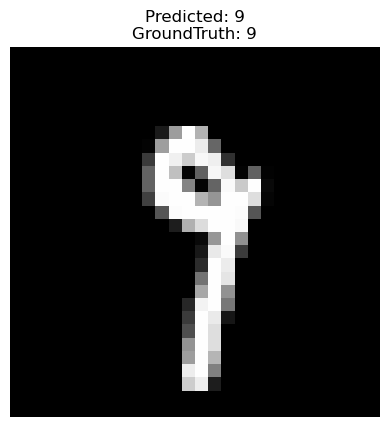

In [33]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0,len(x))
check = train['label'][idx]

plt.axis('off')
plt.title(f'Predicted: {predictions[idx]}\nGroundTruth: {check}')
plt.imshow(x[idx], cmap='gray')

plt.tight_layout
plt.show()